## Phase 4.40

# Neural Networks

## Objectives

- <a href='#intro'>Introduce</a> Neural Network systems.
- Discuss basic <a href='#arch'>conceptual architectures</a>.
- Dive into the process of training a neural network.
    - <a href='#forward'>Forward Prop</a>
    - <a href='#back'>Back Prop</a>

---

<a id='intro'></a>
# Neural Networks
<img src='./images/dogcat.gif' width=700>

## Background
> *Neural networks have been around for a while. They are over 70 years old, dating back to  their proposal in 1944 by Warren McCullough and Walter Pitts. These first proposed neural nets had thresholds and weights, but no layers and no specific training mechanisms.*
> 
> *The "perceptron", the first trainable neural network, was created by Frank Rosenblatt in 1957. It consisted of a single layer with adjustable weights in the middle of input and output layers.*

<img src='./images/perceptron.png' width=500>

### Relation to ML Models
- **Logistic Regression**
    - The *weights* in a neural network are like the *betas*.
        - $ \large \log_b \frac{p}{1 - p} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n \$.
    - The *activation function* in a neural network can be the *sigmoid function*.
    
    
    
- **Stacking Ensembles**
    - Various base models' predictions are fed into a *meta-estimator* that is trained to aggregate them optimally.
        - *Similar to multiple layers in a neural network.*

<a id='arch'></a>
## Basic Architecture
- We'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). 
- Significantly, there will also (generally) be one or more layers of neurons between input and output, called **hidden layers**.

*One reason these are named hidden layers is that what their output actually represents in not really known.  The activation of node 1 of the first hidden layer may represent a sequence of pixel intensity corresponding to a horizontal line, or a group of dark pixels in the middle of a number's loop.*

<img src='./images/Deeper_network.jpeg'>

Because we are unaware of how exactly these hidden layers are operating, neural networks are considered **black box** algorithms.  You will not be able to gain much inferential insight from a neural net.

Each of our pixels from our digit representation goes to each of our nodes, and each node has a set of weights and a bias term associated with it.

# <a href='https://playground.tensorflow.org/'>Interactive: Tensorflow Playground</a>

> *https://playground.tensorflow.org/*

<a id='forward'></a>
## Forward Propagation

**Forward propagation** on the level of the perceptron.

> We will use the built-in dataset of handwritten numbers from `sklearn`, which comes from the UCI Machine Learning collection. Each record is a 64-bit (8x8) image of a handwritten number between 0 and 9. Each pixel value (a number between 0 and 16) represents the relative brightness of the pixel. 
>
> https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
plt.style.use('seaborn-talk')

In [3]:
# Loading data.
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# Slicing a single image out for exploration.
eight_by_eight_image = digits.images[0]

> It is similar to the famous <a href='http://yann.lecun.com/exdb/mnist/index.html'>**MNIST**</a> dataset which is sometimes referred to the <a href='https://www.kaggle.com/c/digit-recognizer'>"*hello world*"</a> of computer vision.

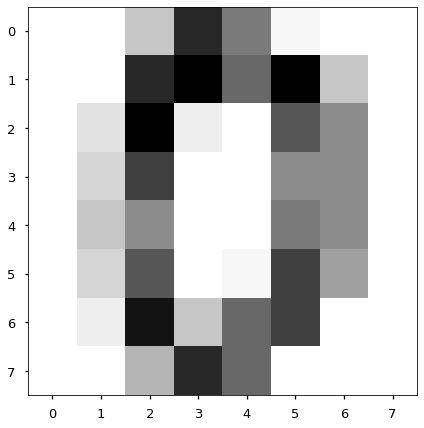

In [5]:
# Looking at the image.
imgplot = plt.imshow(eight_by_eight_image, cmap='Greys')

In [6]:
# Looking at the matrix representation.
eight_by_eight_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.data[0].shape

(64,)

In [9]:
# When passing this data into this network, 
# we want it to exist in a single (flattened) dimension.
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)
flat_image

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [10]:
flat_image.shape

(64, 1)

### Weights
Our weights vector will have **the same number of weights as pixels**.
<img src='./images/log-reg-nn-ex-w.png' width=500>

In [11]:
# Instantiate the weights with random numbers (between -0.1, 0.1)
w = np.random.uniform(-.1, .1, (flat_image.shape[0], 1))
w[:5]

array([[-0.0296429 ],
       [-0.06582645],
       [-0.09377564],
       [-0.06769263],
       [ 0.0174087 ]])

In [12]:
# Setting the bias (think *constant*).
b = 0

### Summation
<img src='./images/log-reg-nn-ex-sum.png' width=500>

Our inputs, the pixels, each are **multiplied by their respective weights** and then **summed together with the bias**. 

This amounts to the dotproduct of the pixel value and the weights.

In [13]:
z = flat_image.T.dot(w) + b
z

array([[-3.1488713]])

### Activation
<img src='./images/log-reg-nn-ex-a.png' width=500>

- The activation function converts our summed inputs into an output, which is then passed on to other nodes in hidden layers (or as an end product in the output layer). 
- *When we build our models in `keras`, we will specify the activation function of both hidden layers and output.*

In [14]:
##### Define plotting function for demonstration. #####
#######################################################

def plot_with(f, title='', X=np.linspace(-10, 10, 20_000)):
    """Plot a function `f` over a given array of X-values."""
    
    y_vals = [f(x) for x in X]

    fig, ax = plt.subplots()
    ax.plot(X, y_vals)
    ax.axhline(0, ls=':', color='tab:red')
    ax.set_title(title)
    fig.tight_layout()

#### Sigmoid
$ \large f(x) = \frac{1}{1 + e^{-x}} $

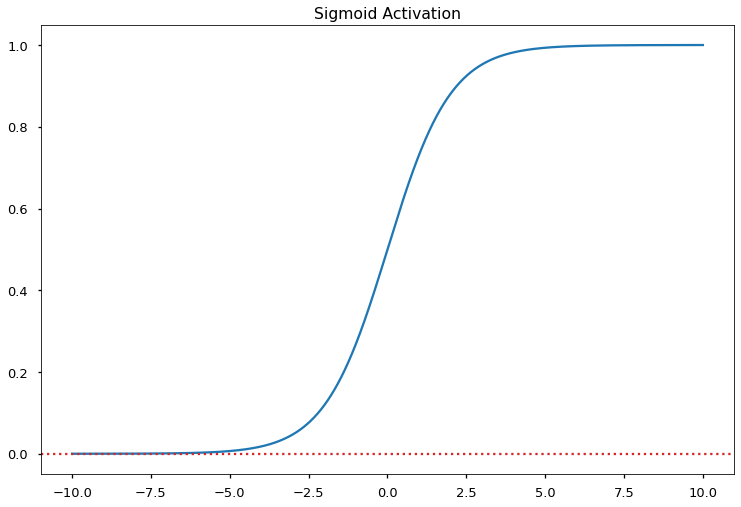

In [15]:
# Define activation function.
def sigmoid(x): 
    return 1 / (1+np.exp(-x))

# Plot
plot_with(sigmoid, title='Sigmoid Activation')

#### tanh

$ \large f(x) = tanh(x) = f\frac{e^x - e^{-x}}{e^x + e^{-x}}  $

The hyperbolic tangent function is a shifted version of the sigmoid. 

- The inflection point passes through 0,0 instead of 0,.5, and the output is between -1 and 1.  This means the mean of the output is centered around 0, which can make learning in the next layer easier. 
- tanh is almost always better in a **hidden layer** than sigmoid because it <a href='https://stats.stackexchange.com/questions/330559/why-is-tanh-almost-always-better-than-sigmoid-as-an-activation-function'>speeds up learning</a>. 
- For the output layer, however, sigmoid makes sense for binary outcomes.

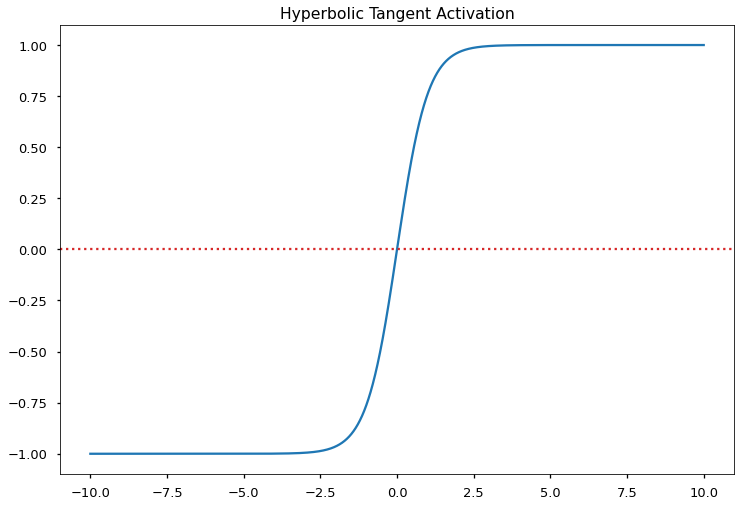

In [16]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


# Plot
plot_with(tanh, title='Hyperbolic Tangent Activation')

> *One problem with tanh and sigmoid is that **if our input is large, the slope of the activation function flattens out**.*
>
> *When conducting backpropagation, we will use the derivative of the activation function as one of our terms multiplied by a learning rate to determine how big a step to take when adjusting our weights. If our derivative is close to zero, the step will be very small, so the speed of our learning will be very slow.  This is called the **vanishing gradient** problem.*

#### ReLU
***Rectified Linear Units***

$ \large f(x) = \max(0, x)$

ReLU is a commonly used and effective activation function because of speed.  

Given that the **output** is zero when negative, some nodes become inactive (i.e. produce an output of 0).  Zero outputs take little computational power. Also, the constant gradient leads to faster learning in comparison to sigmoid and tanh, which come close to 0 with large positive and large negative values. Since the speed of our network is linked to the derivative, a derivative close to zero will result in slow learning.

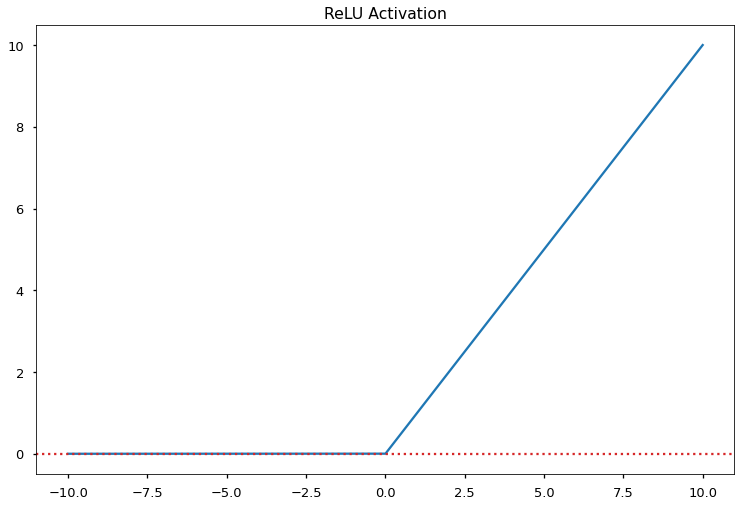

In [17]:
def relu(x):
    return max((0, x))


# Plot
plot_with(relu, title='ReLU Activation')

#### Leaky ReLU

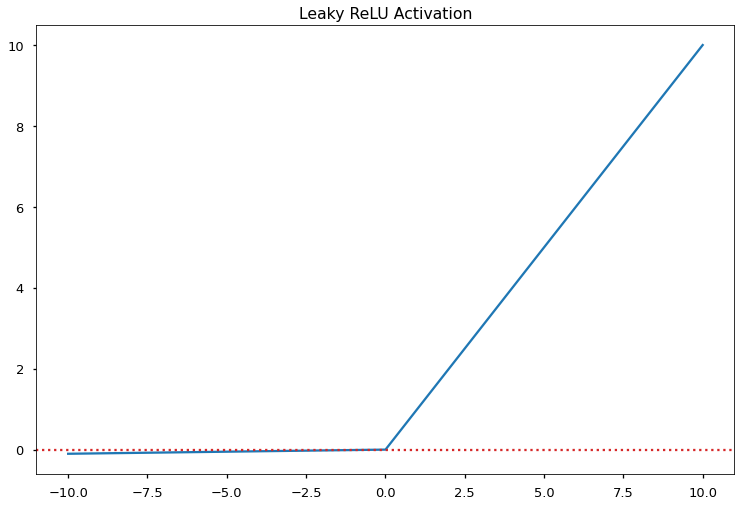

In [18]:
def leaky_relu(x, a=0.01):
    if x > 0:
        return x
    return a * x # Adds a small positive gradient to inactive units.


# Plot
plot_with(leaky_relu, title='Leaky ReLU Activation')

#### Swish

***New activation function! Thanks Google.***

Looks like ReLU, but has a nonzero derivative everywhere.

$ \large f(x) = \frac{x}{1 + e^{-x}} $

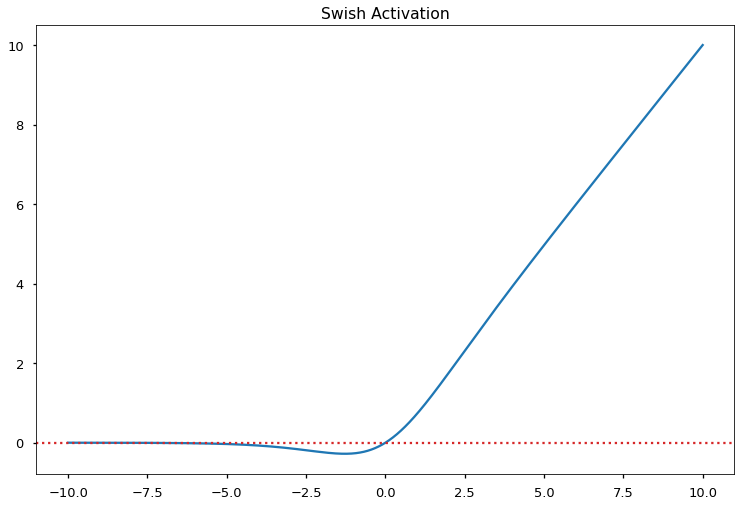

In [19]:
def swish(x):
    return x / (1 + np.exp(-x))


# Plot
plot_with(swish, title='Swish Activation')

#### Softmax (Output Layer)

$ \large f(x_0) = \frac{e^{x_0}}{\Sigma_{x\epsilon X}e^x} $

Because this function relates each value to the sum of all values, this is the appropriate activation in the output layer for **multi-class** classification problems. We can interpret the function as outputting the probabilities of belonging to each class.

---

<a href='https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a'>More on Activation Functions: TowardsDataScience</a>

## Back to our example...

In [20]:
# Train test split.
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=51, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [21]:
# First layer.
# Dot product against weight vector and add the bias.
z_0 = X_train.dot(w) + b
z_0.shape

(1437, 1)

In [22]:
z_0[:5]

array([[ 0.06966044],
       [-1.28073772],
       [-3.5232261 ],
       [-2.1993866 ],
       [-4.08353298]])

In [23]:
# Apply activation function.
a_0 = sigmoid(z_0)
a_0

array([[0.51740807],
       [0.21742467],
       [0.02865855],
       ...,
       [0.04298422],
       [0.23901028],
       [0.0965546 ]])

In [24]:
# ...or use ReLU
a_0_relu = [relu(z) for z in z_0]
a_0_relu[:10]

[array([0.06966044]), 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
# Next layer.
# Taking weights randomly.
w_1 = np.random.normal(0, 0.1, (X_train.shape[1], 4))
w_1.shape

(64, 4)

In [26]:
# Making new bias.
b_1 = 0

In [27]:
z_1 = X_train.dot(w_1) + b_1
z_1

array([[-5.01673298,  6.66065812,  7.90268798, -4.38020701],
       [-1.432263  ,  6.60765687,  6.61699319, -2.44365858],
       [ 2.26658235,  9.27273829, 11.32148048, -0.74389295],
       ...,
       [ 8.23179278,  9.39317237, 13.01563147, -2.62438879],
       [ 1.9125688 ,  3.26248458,  9.7019756 , -3.80397445],
       [ 3.11487087, 12.13383263,  8.85048435, -2.4433066 ]])

In [28]:
a_1 = sigmoid(z_1)
a_1

array([[0.00658252, 0.99872133, 0.99963039, 0.01236789],
       [0.19274633, 0.99865183, 0.99866434, 0.07990352],
       [0.90607133, 0.99990606, 0.99998789, 0.32215345],
       ...,
       [0.99973401, 0.99991672, 0.99999777, 0.0675852 ],
       [0.87130746, 0.96311915, 0.99993884, 0.02179637],
       [0.957502  , 0.99999463, 0.99985671, 0.0799294 ]])

*Now each of these neurons has a set of weights and a bias associated with it.*

In [29]:
w_1 = np.random.normal(0, 0.1, (a_1.shape[1], 1))

w_1.shape

(4, 1)

In [30]:
z_1 = a_1.dot(w_1)

In [31]:
output = sigmoid(z_1)
y_pred = output > .5
y_hat = y_pred.astype(int)
y_hat[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

We have successfully manually performed forward propagation for our model.

These are actual predictions based on the randomly-generated weights we created.

**So what happens next?**...

<img src='./images/ff-bb.gif'>

<a id='back'></a>
## Back Propagation

After a certain number of data points (*batch*) have been passed through the model, the weights will be updated with *an eye toward optimizing our loss function*.

*Typically, this is done by using some version of gradient descent.*

<img src='./images/BackProp_web.png'>

- Back prop begins with a **loss function** which assesses how well our predictions were. 
    - For continuous outputs: **mean_squared_error**.
    - For binary outputs: **binary_crossentropy**.
    - For multiclass outputs: **categorical_crossentropy** (or log-loss).
        - $ \large \mathcal{L}{(\hat{y}, y)}= -\frac{1}{m} * \sum\limits_{i=1}^m y_i\log{\hat{y}} + (1-y_i)\log(1-\hat{y}) $
        
        
### Gradient Descent
Gradient Descent is the process of **calculating the partial derivatives of our loss function** with regard to each tunable parameter of our network. 

> For a single-hidden-layer network, we have the following parameters to tune:
>
> - 1 bias (associated with the output layer)
> - $n$ weights (attached to the $n$ neurons feeding into our output layer from our hidden layer)
> - $n$ biases (associated with each neuron in the hidden layer)
> - $m$ x $n$ weights (associated with the number of $m$ input rows into each of the $n$ neurons in the hidden layer)

---

There are **three main types** of gradient descent that we can implement in our networks. 

Each differs by the **amount of data pushed through the system in one round of forward propagation**. 

In all cases, an **epoch** refers to the end point of one cycle of data where all data points have passed through the network.  

#### Batch Gradient Descent
- Steps:
    1. Push all our data through our network at once,
    2. initiate back-prop and update the parameters.
    
    
- In this case, *one epoch consists of only one round of forward propagation*.

#### Mini-Batch Gradient Descent
- Steps:
    1. Randomly choose a subset of our data, 
    2. push it forward through our network, 
    3. calculate the loss and with gradient descent update our parameters, 
    4. proceed with a new random subset.  
    
    
- Each example passes once through our network during one epoch.  Once all examples have been processed, the next epoch begins.

#### Stochastic Gradient Descent
- Steps:
    1. Pick a single example from our training set, 
    2. pass it through the the network, 
    3. updates the parameters, 
    4. proceed to the next example.


<a href='https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/'>There are pros and cons of each type of gradient descent.</a> For now, we will say that using mini-batch gradient descent can substantially speed up learning. 

## Keras Optimizers

> https://keras.io/api/optimizers/
>
> **Available Optimizers**
> - SGD
> - RMSprop
> - Adam
> - Adadelta
> - Adagrad
> - Adamax
> - Nadam
> - Ftrl

*We have already been introduced to learning rate during our lectures on gradient descent. We update our parameters with small steps regulated by both the slope of the gradient with respect to the partial derivative and a learning rate.*

$ \large w_1 := w_1 - \delta w_1 * \alpha $

*We choose $\alpha$, our learning rate, to be a small number, so that we can make incremental steps down the gradient in the direction of minimizing our loss function.*

*Instead of treating each parameter equally, **Adam** adapts the learning rate for every parameter in order to speed up learning. Adam is considered state of the art.*

---

> Tensorflow Addon: **LAMB** (Layer-wise Adaptive Moments)
> - Tensorflow Addon: <a href='https://github.com/tensorflow/addons/blob/master/tensorflow_addons/optimizers/lamb.py'>Tensorflow GitHub</a>
> - Paper: <a href='https://arxiv.org/abs/1904.00962'>Large Batch Optimization for Deep Learning: Training BERT in 76 minutes</a>

---

***Additional Resource:*** 
> <a href='https://youtu.be/aircAruvnKk'>*3 Blue 1 Brown: But What is a Neural Network?*</a>